In [175]:
import numpy as np
from math import pi, sqrt, tanh
import matplotlib.pyplot as plt
# from quimb import *
import time
from os import path


In [2]:
def Hilbertspace_Zr(N,r):

    states=np.zeros((r**N,N),dtype=int)

    for i_1 in range(r**N):
        num_str=np.base_repr(i_1,base=r)[::-1]
        for i_2 in range(len(num_str)):
            states[i_1,i_2]=int(num_str[i_2])

    return states
# print( np.arange(int(r**(N-1)))  )
# print(states)

def p_transpose_2(V,Na,Nb):
# partial transpose with respect to subsystem 2
# the basis of NaxNb density matrix is defined by Nb*(i-1)+j,
# i,j=1,2,3 spans the Hilbert space of subsystem 1 and 2 respectively
    U=np.zeros((Na*Nb,Na*Nb), dtype=np.complex128)
    for i_1 in range(Na):
        for i_2 in range(Na):
#             print(V[Nb*i_1:Nb*(i_1+1),Nb*i_2:Nb*(i_2+1)].shape)
            U[Nb*i_1:Nb*(i_1+1),Nb*i_2:Nb*(i_2+1)]=np.transpose(V[Nb*i_1:Nb*(i_1+1),Nb*i_2:Nb*(i_2+1)])

    return U


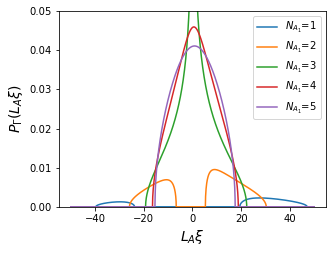

In [56]:
## vs. Na1/Na

def Gz(z,a,b):
    '''Direct solution to G(z), faster but has numerical instability for large V
    a=  Lb/L2
    b=  Lb*L1/L2
    '''
    a2= (b-1)/z +1j*0
    a1= (a-z)/z +1j*0
    a0= 1/z +1j*0
    Q= (3*a1-a2**2)/9 +1j*0
    R= (9*a2*a1-27*a0-2*a2**3)/54 +1j*0
    D= Q**3 + R**2 +1j*0
    S= (R+D**0.5 +1j*0)**(1/3)
    z4= -a2/3 + (1-1j*sqrt(3))*Q/S/2-(1+1j*sqrt(3))/2*S
    return np.abs(np.imag(z4))


Lab=10
Lc=4
L=Lab+Lc

Nc=r**Lc
Nab=r**Lab

plt.figure(figsize=(4.8,3.6))
for i_n in range(int(Lab/2)):
# for i_n in range(0,4):
# for i_n in [4]:
    Na=r**(i_n+1)
    Nb=r**(Lab-i_n-1)

#     num_bins = 70

#     n, bin_edges = np.histogram(v1b[:,i_n], bins=num_bins)

#     bins_center= (bin_edges[0:num_bins]+ bin_edges[1:])/2
#     n= n/np.sum(n)/(bin_edges[1]-bin_edges[0])

#     plt.plot(bins_center,n,'o',markersize=2,color='C%d' % (i_n),label='Na=%d' % (i_n+1) )

#     xplot=np.linspace(-1,1)*1.5+1j*0
    a = Nc/Nb +1j*0
    b = Nc/Nb*Na +1j*0

    fx =  Nb/Nc
    fy =  Nc/pi/Nb
    xplot= np.linspace(-1,1,2000)/fx*50 #+1j*1e-12
    yplot=np.abs(Gz(xplot,a,b))
    plt.plot(xplot*fx,fy*yplot,color='C%d' % (i_n),label=r'$N_{A_1}$=%d' % (i_n+1) )


plt.ylim(0,0.05)
plt.legend()
fsize=14
plt.ylabel(r'$P_\Gamma(L_A \xi)$',fontsize = fsize)
plt.xlabel(r"$L_A \xi$",fontsize = fsize)
# plt.xlim(-0.12,0.12)
plt.show()

In [179]:
Nrep=10000
r=2 # local Hilbert space dim

Lab=8
R12=1/4
Lc_sw=np.arange(2,12,1)

neg=np.zeros(Nrep)
# v1b=np.zeros((Nrep*Nab,len(Lc_sw)))
v1b=np.zeros(Nrep*Nab)

t_timer=time.time()
# np.random.seed(1)

for i_n in range(len(Lc_sw)):
    Lc= Lc_sw[i_n]
    print('Lc= %d' % (Lc), end='\r')
    Nc=r**Lc
    Nab=r**Lab

    Na=int(r**(Lab*R12))
    Nb=int(r**(Lab*(1-R12)))

    for i_r in range(Nrep):    
    
        #### no symmetry
        X=np.random.randn(Nab,Nc)+1j*np.random.randn(Nab,Nc)

        mat=np.dot(X,np.matrix(X).H)
        rho= mat / np.trace(mat)

        rT2b = p_transpose_2(rho,Na,Nb)
        l1T=np.linalg.eigvalsh(rT2b)
        v1b[i_r*Nab:(i_r+1)*Nab] = (Nab)*l1T

    f1= 'NS_LA_%d_%d_LB_%d.npz' % (La,Lb,Lc)
    out_dir = 'data_draft/' 
    fname = out_dir+f1
    np.savez(fname, evals=v1b, Nrep=Nrep)
    
elapsed = time.time() - t_timer
print("Finished, elapsed time = %.2f " % (elapsed)+ "sec")

Finished, elapsed time = 2009.01 sec


No. of reps:  10000


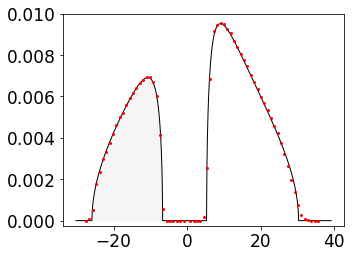

No. of reps:  10000


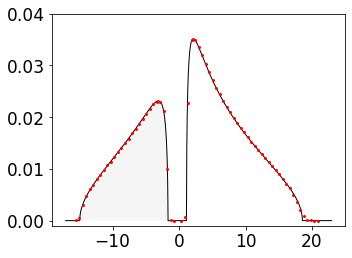

No. of reps:  10000


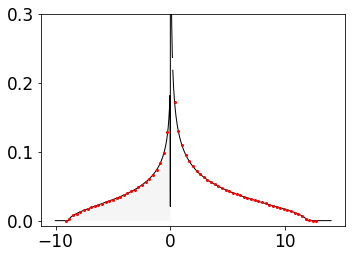

No. of reps:  10000


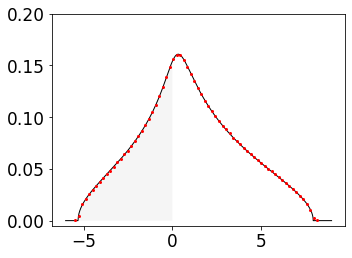

No. of reps:  10000


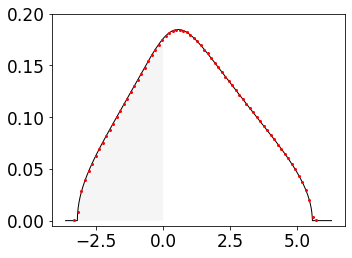

No. of reps:  10000


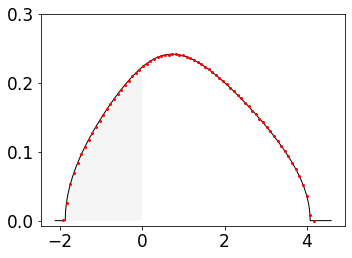

No. of reps:  10000


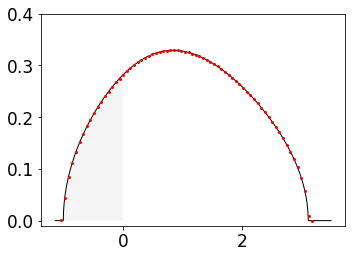

No. of reps:  10000


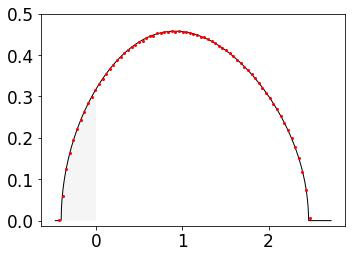

No. of reps:  10000


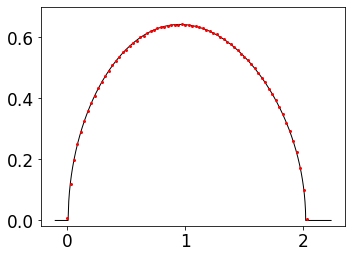

No. of reps:  10000


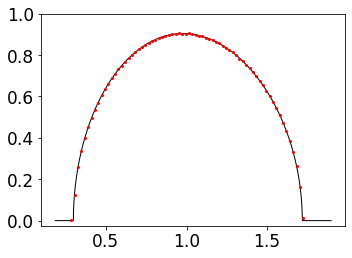

In [181]:
### vs Na/(Na+Nb)

Lab=8
R12=1/4
Lc_sw=np.arange(2,12,1)

for i_n in range(len(Lc_sw)):
# for i_n in [2]:
    Lc= Lc_sw[i_n]
    Nc=r**Lc
    Nab=r**Lab

    La = int(Lab*R12)
    Lb = int(Lab*(1-R12))
    Na = r**La
    Nb = r**Lb
    plt.figure(figsize=(5.2,3.9))

    num_bins = 70

    fname= 'data_draft/NS_LA_%d_%d_LB_%d.npz' % (La,Lb,Lc)
    if path.exists(fname):
        npzfile = np.load(fname)
        v1T=npzfile['evals']
        print('No. of reps: ', npzfile['Nrep'])
    else:
        continue

    n, bin_edges = np.histogram(v1T, bins=num_bins)

    bins_center= (bin_edges[0:num_bins]+ bin_edges[1:])/2
    n= n/np.sum(n)/(bin_edges[1]-bin_edges[0])


#     xplot=np.linspace(-1,1)*1.5+1j*0
    a = Nc/Nb +1j*0
    b = Nc/Nb*Na +1j*0

    fx =  Nb/Nc
    fy =  Nc/pi/Nb
#     xplot= np.linspace(-2,3,2000)/fx*3 #+1j*1e-12
    if i_n<=7:
        xplot= np.linspace(bins_center.min(),bins_center.max(),2000)/fx*1.1 #+1j*1e-12
    else:
        xplot= np.linspace(bins_center.min()-0.1,1.1*bins_center.max(),2000)/fx #+1j*1e-12
    yplot=np.abs(Gz(xplot,a,b))
    
    if i_n==2:
        ind=851
        plt.plot(xplot[0:ind-1]*fx,fy*yplot[0:ind-1],color='k',linewidth=1)#,color='C%d' % (i_n))#,label=r'$N_{B}$=%d' % (Lc) )
        plt.plot(xplot[ind+1:]*fx,fy*yplot[ind+1:],color='k',linewidth=1)#,color='C%d' % (i_n))#,label=r'$N_{B}$=%d' % (Lc) )
        plt.fill_between(xplot*fx,fy*yplot, where=xplot<0, facecolor='whitesmoke',interpolate=True)#,color='C%d' % (i_n))#,label=r'$N_{B}$=%d' % (Lc) )
    else:
        plt.plot(xplot*fx,fy*yplot,color='k',linewidth=1)#,color='C%d' % (i_n))#,label=r'$N_{B}$=%d' % (Lc) )
        plt.fill_between(xplot*fx,fy*yplot, where=xplot<0, facecolor='whitesmoke',interpolate=True)#,color='C%d' % (i_n))#,label=r'$N_{B}$=%d' % (Lc) )

    plt.plot(bins_center,n,'o',color='red',markersize=2)#,color='C%d' % (i_n),label='Na=%d' % (i_n+1) )

#     plt.plot(fy*yplot,color='C%d' % (i_n))#,label=r'$N_{B}$=%d' % (Lc) )

    if i_n==0:
        ymax=0.01
        plt.ylim(-ymax/40,ymax)
    elif i_n==1:
        ymax=0.04
        plt.ylim(-ymax/40,ymax)
    elif i_n==2:
        ymax=0.3
        plt.ylim(-ymax/40,ymax)
    elif i_n==3:
        ymax=0.2
        plt.ylim(-ymax/40,ymax)
    elif i_n==4:
        ymax=0.2
        plt.ylim(-ymax/40,ymax)
    elif i_n==5:
        ymax=0.3
        plt.ylim(-ymax/40,ymax)
    elif i_n==6:
        ymax=0.4
        plt.ylim(-ymax/40,ymax)
    elif i_n==7:
        ymax=0.5
        plt.ylim(-ymax/40,ymax)
    elif i_n==8:
        ymax=0.7
        plt.ylim(-ymax/40,ymax)
    else :
        ymax=1
        plt.ylim(-ymax/40,ymax)
#     plt.legend()
#     plt.title(r'$N_{B}$=%d' % (Lc))
    fsize=14
#     plt.ylabel(r'$P_\Gamma(L_A \xi)$',fontsize = fsize)
#     plt.xlabel(r"$L_A \xi$",fontsize = fsize)
    # plt.xlim(-0.12,0.12)
    plt.rcParams.update({'font.size': fsize+3})
    plt.tight_layout()
    plt.savefig('figs/NS_LA_%d_%d_LB_%d_.pdf' % (La,Lb,Lc))
    plt.show()

In [ ]:
np.argwhere(yplot<1e-3)